In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import functools 
import datetime
from datetime import datetime
import datetime
import statistics
from sklearn.cross_validation import train_test_split
import statsmodels.api as sma
import re

import numpy as np
from numpy import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import functools 
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Shilpi Dey\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
os.chdir("C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Data\\Intermediate")

slag_data = pd.read_excel('slag_data_flatfile_dec_v2.xlsx',sheet_name="Sheet1",skiprows=0,header=0)
slag_data['LADLE LIFE'] = pd.to_numeric(slag_data['LADLE LIFE'], errors='coerce')


slag_data.drop(columns=['STEEL GRADE'],inplace=True)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Data\\Intermediate'

In [3]:
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    print(slag_data.dtypes)

DATE                     datetime64[ns]
HEAT NO                          object
GRADE                            object
HOT METAL(MT)                   float64
VESSEL DETAILS LIFE               int64
IRON ORE(KG)                    float64
TOTAL(MT)                       float64
HOT METAL(MT).1                 float64
STEEL                           float64
LIME (KG)                       float64
RAW DOLO (KG)                   float64
COKE (KG)                       float64
TOTAL O2(NM3) MAIN              float64
REBLOW                          float64
PPM 1                           float64
PPM 2                           float64
LANCE_LIFE                      float64
TAPPING DETAILS START            object
TAPPING DETAILS  END             object
C_OLP                           float64
MN_OLP                          float64
S_OLP                           float64
P_OLP                           float64
SI_OLP                          float64
AL_OLP                          float64


In [4]:
##Shortlisting the slag_data
slag_data = slag_data[(slag_data['DATE']>='2019-09-01') & (slag_data['DATE']<='2019-12-31')]
#1278

In [5]:
slag_data = slag_data[slag_data['SLAG_PERC']<=75]

## Create reversal

In [6]:
slag_data['REVERSAL'] = (slag_data.P_TUN-slag_data.P_BOF)
slag_data['REVERSAL_OLP'] = (slag_data.P_OLP-slag_data.P_BOF)

slag_data['P_REVERSAL'] = [0 if x <=.005 else 1 for x in slag_data['REVERSAL']]
slag_data['P_REVERSAL'] = slag_data['P_REVERSAL'].apply(str)

## Apply the cut off of response time as 0 to 8


In [7]:
##As inbuilt time is 6, so cut off will be 6 to 14
slag_data = slag_data[(slag_data['Tap End - Alarm Time']>6) & (slag_data['Tap End - Alarm Time']<14)]
#(1027, 174)


slag_data2 = slag_data[['DATE',
                        'HEAT NO',
                        'GRADE',
                        'HOT METAL(MT)',
                        'VESSEL DETAILS LIFE',
                        'IRON ORE(KG)',
                        'TOTAL(MT)',
                        'HOT METAL(MT).1',
                        'STEEL',
                        'LIME (KG)',
                        'RAW DOLO (KG)',
                        'COKE (KG)',
                        'TOTAL O2(NM3) MAIN',
                        'REBLOW',
                        'PPM 1',
                        'PPM 2',
                        'LANCE_LIFE',
                        'P_OLP',
                        'MN_BOF',
                        'C_BOF',
                        'MN_BOF',
                        'S_BOF',
                        'P_BOF',
                        'SI_BOF',
                        'AL_BOF',
                        'TI_BOF',
                        'CR_BOF',
                        'NI_BOF',
                        'MO_BOF',
                        'V_BOF',
                        'CU_BOF',
                        'NB_BOF',
                        'B_BOF',
                        'SN_BOF',
                        'CA_BOF',
                        'N_BOF',
                        'H_BOF',
                        'O_BOF',
                        'SB_BOF',
                        'W_BOF',
                        'PB_BOF',
                        'MG_BOF',
                        'ARS_BOF',
                        'ZR_BOF',
                        'CO_BOF',
                        'ZN_BOF',
                        'CE_BOF',
                        'BI_BOF',
                        'FE_BOF',
                        'TIINS_BOF',
                        'TISOL_BOF',
                        'BSOL_BOF',
                        'ALSOL_BOF',
                        'ALINS_BOF',
                        'CAINS_BOF',
                        'CASOL_BOF',
                        'BINS_BOF',
                        'STEEL TYPE',
                        'STEELGRADE',
                        'SET_POINT',
                        'SLAG_PERC',
                        'TAP_DURATION',
                        'ALLOY_SIGNAL',
                        'P_MAX',
                        'S_MAX',
                        'Tap End - Alarm Time',
                        'Tap Hole Life',
                        'Turn Down Temp',
                        'LADLE LIFE',
                        'REVERSAL',
                        'REVERSAL_OLP',
                        'P_REVERSAL']]

slag_data2['Vessel'] = slag_data2['HEAT NO'].str[:2]

C:\Users\Shilpi Dey\Documents\ANACONDA\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Count missing values, percentile, std deviation, quartiles, etc

In [1]:
os.chdir("C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020")

percent_missing = slag_data2.isnull().sum() * 100 / len(slag_data2)
missing_value_df = pd.DataFrame({'column_name': slag_data2.columns,
                                 'percent_missing': percent_missing})
#missing_value_df.sort_values('percent_missing', inplace=True)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(missing_value_df)

#missing_value_df.to_csv("missing_values.csv")



##using describe to get mean, median, count, min, maximum, 
print("Description of the following OLP")
k=slag_data2.describe()
m=slag_data2.quantile([0.0,0.1,.2,.3,.4, 0.5,.7,.8, .9])
s= k.append(m)


#Adding missing percentage
s.loc[s.shape[0]] =1-(s.iloc[0]/slag_data2.shape[0])

##Changing index value
as_list = s.index.tolist()
as_list

idx = as_list.index(17)
as_list[idx] = 'Missing percentage'
s.index = as_list
#Writing the file
#s.to_csv("description.csv")

##categories of different purging
#pd.DataFrame(olp_final4['PURGING STATUSB/T'].value_counts()).to_csv("Purging.csv")

NameError: name 'os' is not defined

In [11]:
##Removing the columns which have 40% missing values

In [12]:
param_missing = pd.DataFrame(s.iloc[-1,:]).reset_index()
cols=list(param_missing[param_missing['Missing percentage']<.4]['index'])
cols.extend(['GRADE', 'STEEL TYPE','P_REVERSAL','Vessel'])

slag_data2 = slag_data2[cols]
slag_data2 = slag_data2.loc[:,~slag_data2.columns.duplicated()]

slag_data2.drop(columns=['P_OLP'],inplace=True)

##removing where temp1 is not given
# olp_final5.dropna(subset=['TEMP 1'],inplace=True)

In [13]:
slag_data2.columns
slag_data2.shape
# 'P_OLP', 
# 'ALLOY_SIGNAL', 'GRADE','STEEL TYPE', 'P_REVERSAL',
##863

(863, 42)

In [14]:
slag_data2['ALLOY_SIGNAL'] = slag_data2.ALLOY_SIGNAL.astype(str)

## BoxPlots for categorical variables

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Boxplots 


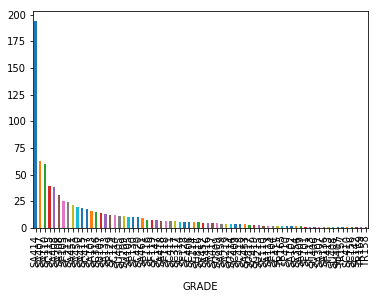

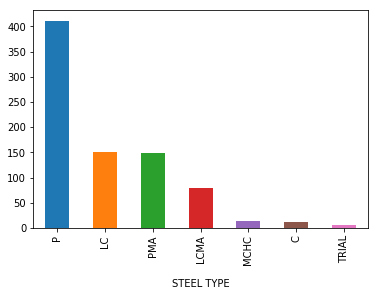

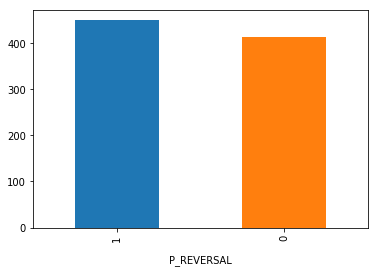

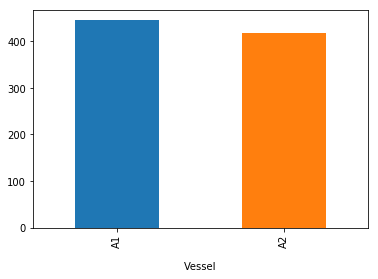

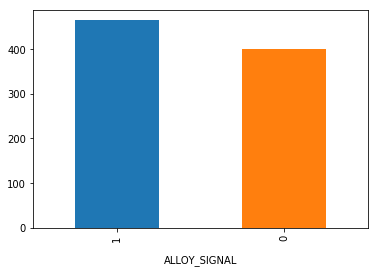

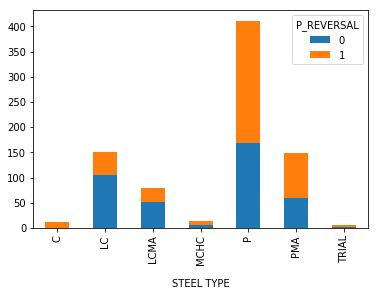

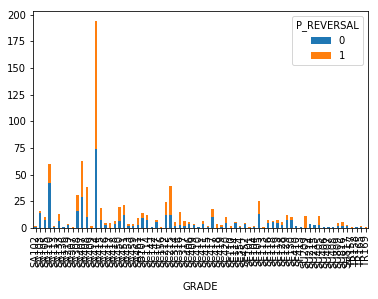

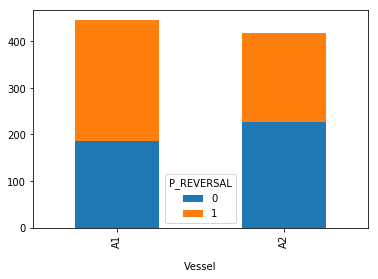

In [15]:
slag_data_cat = slag_data2[[ 'GRADE', 'STEEL TYPE','P_REVERSAL','Vessel','ALLOY_SIGNAL']]
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Boxplots"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
os.chdir(path)
for column in slag_data_cat:
    #fig1 = plt.figure()
    fig, ax = plt.subplots()
    slag_data_cat[column].value_counts().plot(ax=ax, kind='bar')
    plt.xlabel(column, labelpad=14)
    plt.savefig(column+'.jpg',dpi=400)
    plt.show()



slag_data3 = slag_data2.groupby(['P_REVERSAL', 'STEEL TYPE'])['STEEL TYPE'].count().unstack('P_REVERSAL').fillna(0)

#fig, ax = plt.subplots()
slag_data3[['0','1']].plot(kind='bar', stacked=True)
plt.xlabel('STEEL TYPE', labelpad=14)
plt.savefig('phos_steel.jpg',dpi=400)
plt.show()


slag_data3 = slag_data2.groupby(['P_REVERSAL', 'GRADE'])['GRADE'].count().unstack('P_REVERSAL').fillna(0)
slag_data3[['0','1']].plot(kind='bar', stacked=True)
plt.xlabel('GRADE', labelpad=14)
plt.savefig('phos_GRADE.jpg',dpi=400)
plt.show()
slag_data3.to_excel("phos_grade.xlsx")


slag_data3 = slag_data2.groupby(['P_REVERSAL', 'Vessel'])['Vessel'].count().unstack('P_REVERSAL').fillna(0)
slag_data3[['0','1']].plot(kind='bar', stacked=True)
plt.xlabel('Vessel', labelpad=14)
plt.savefig('phos_vessel.jpg',dpi=400)
plt.show()

## Box plots for continuous variables

Creation of the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Boxplots failed


C:\Users\Shilpi Dey\Documents\ANACONDA\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


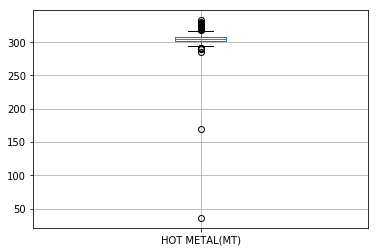

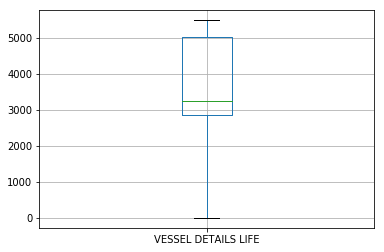

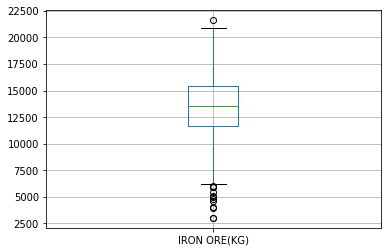

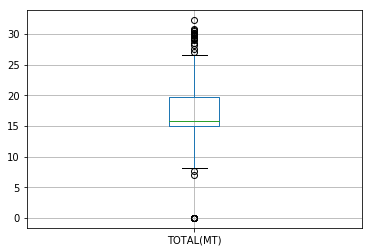

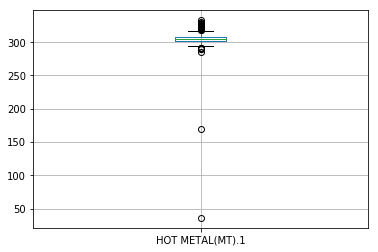

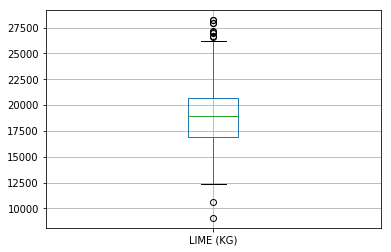

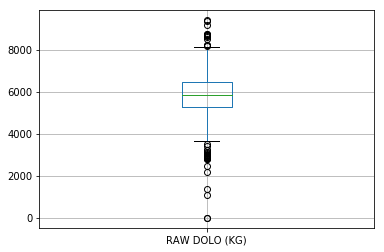

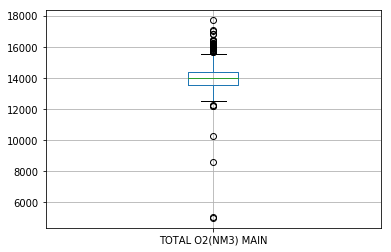

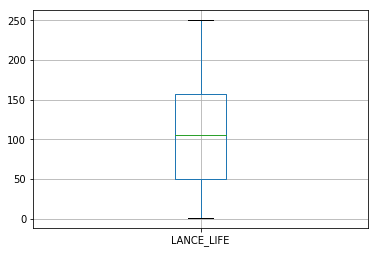

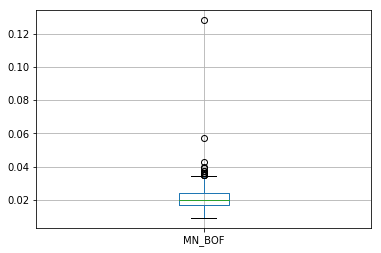

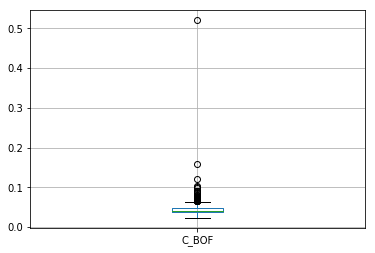

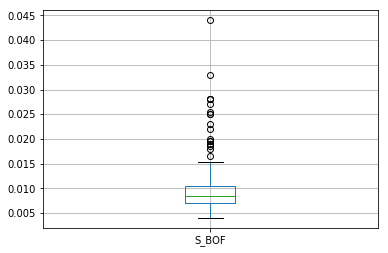

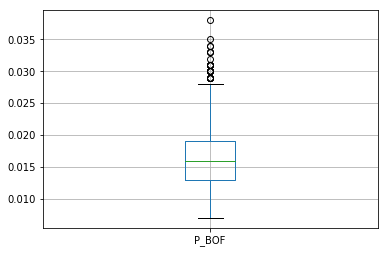

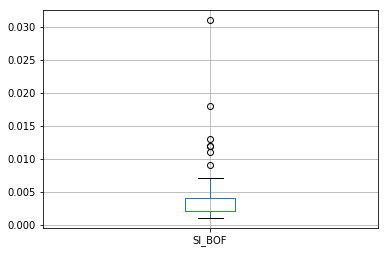

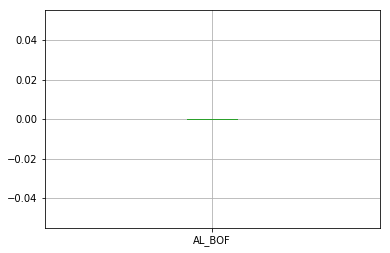

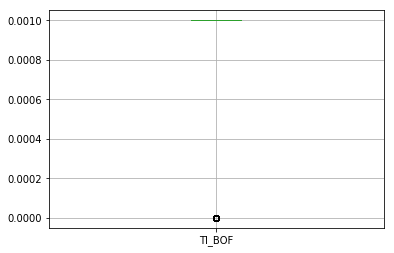

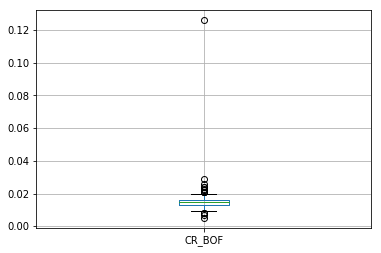

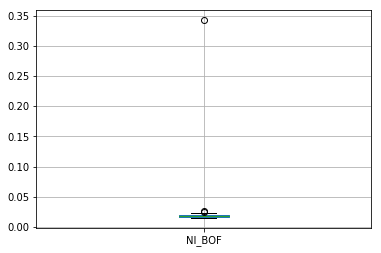

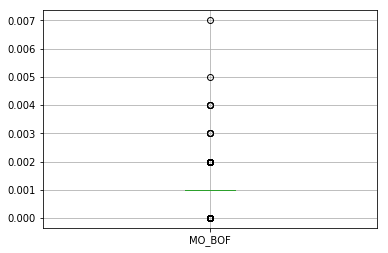

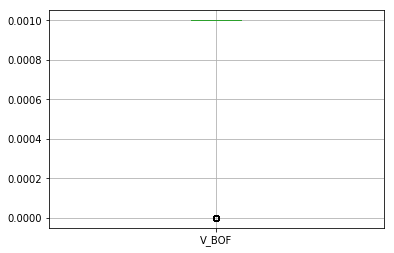

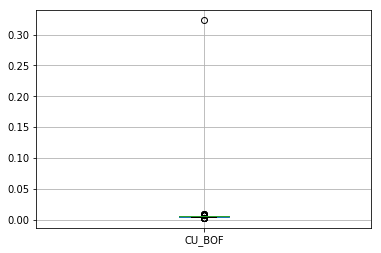

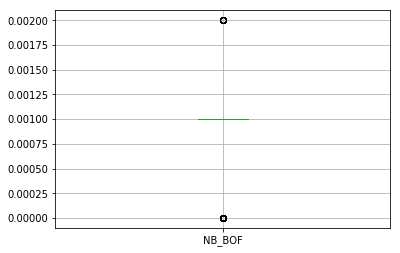

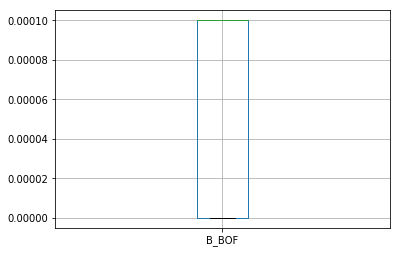

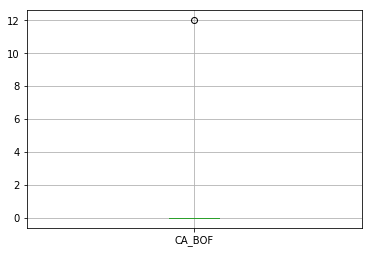

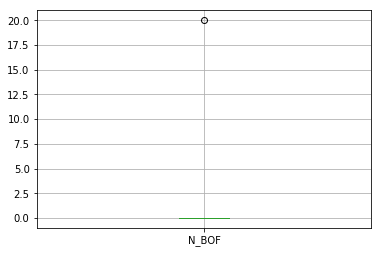

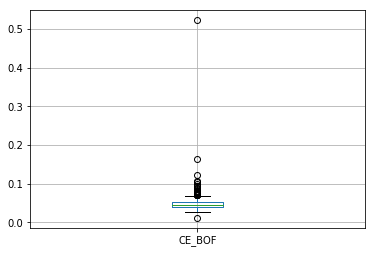

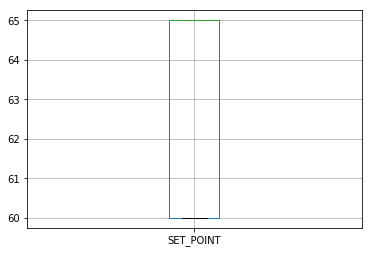

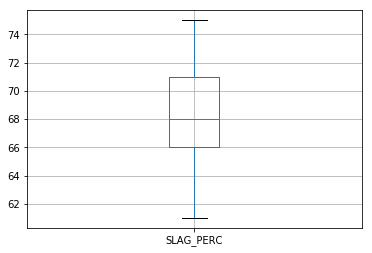

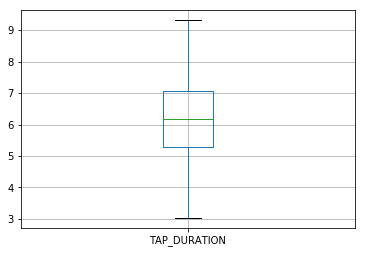

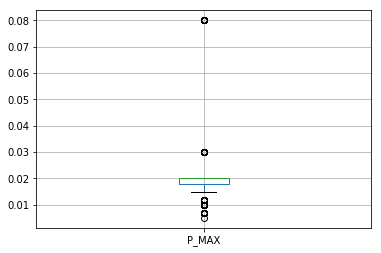

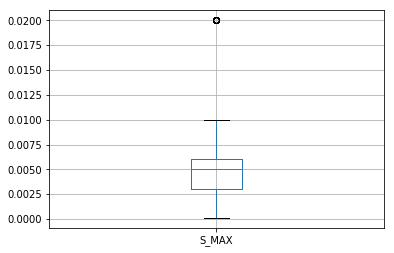

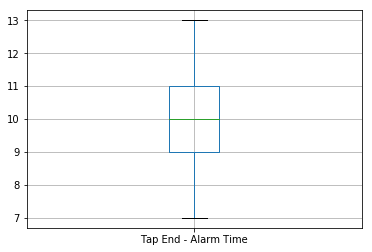

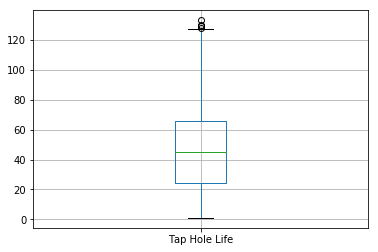

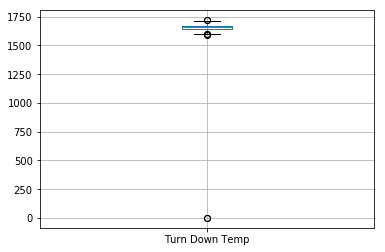

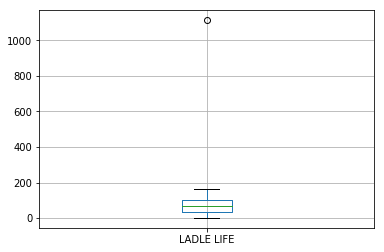

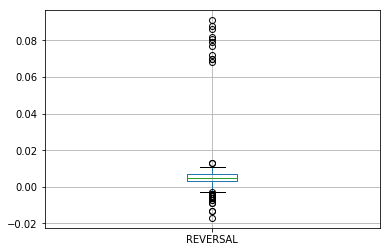

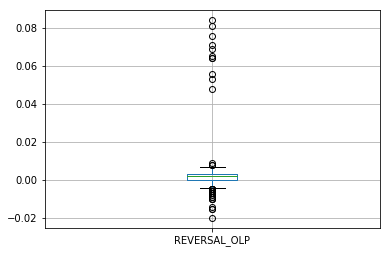

In [16]:
slag_data4 = slag_data2.drop(columns=['ALLOY_SIGNAL','GRADE', 'STEEL TYPE','P_REVERSAL','Vessel'])
#Box Plots
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Boxplots"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
os.chdir(path)
for column in slag_data4:
    fig = plt.figure()
    slag_data4.boxplot([column])
    fig.savefig(column+'.jpg')

## Histogram

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Histogram 


C:\Users\Shilpi Dey\Documents\ANACONDA\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


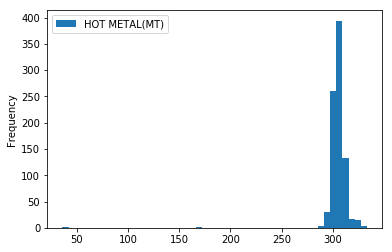

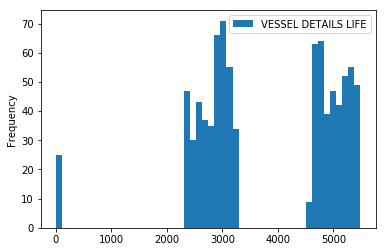

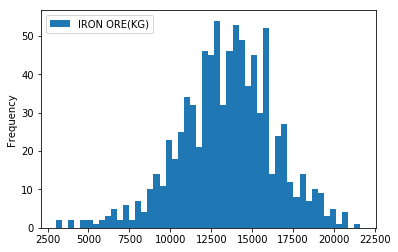

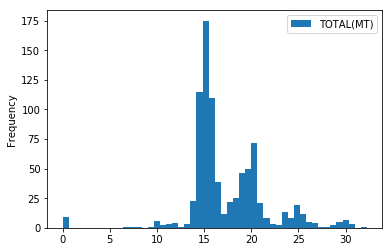

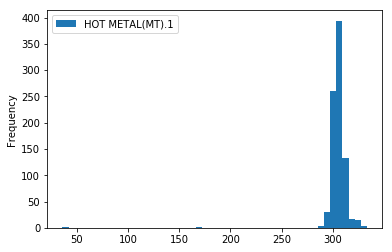

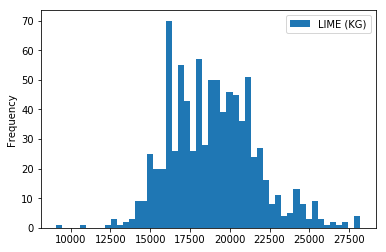

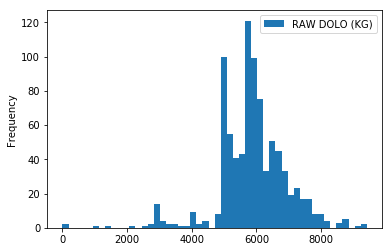

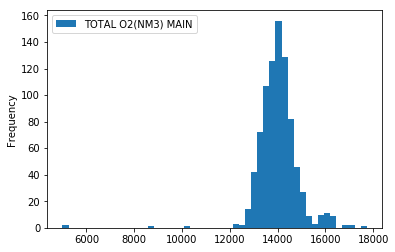

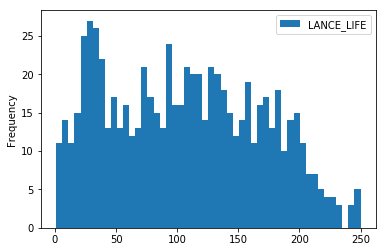

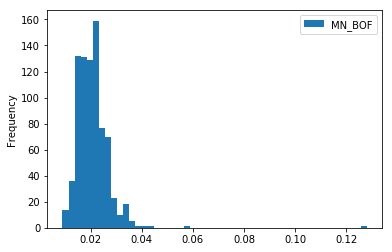

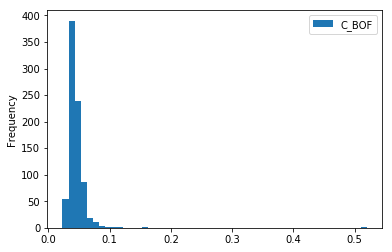

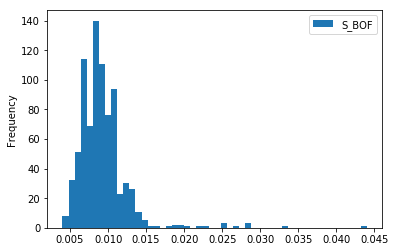

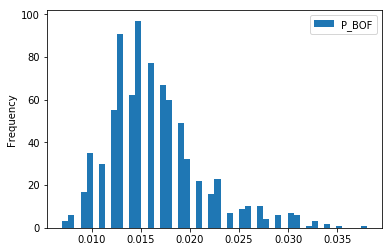

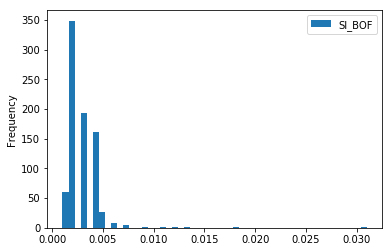

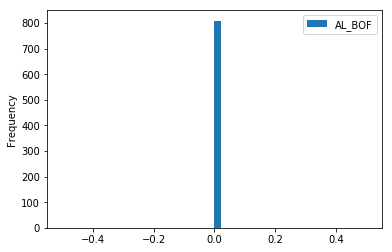

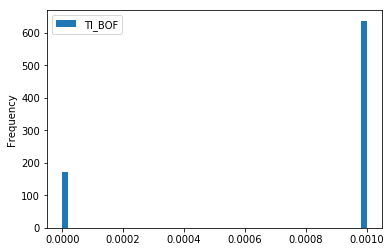

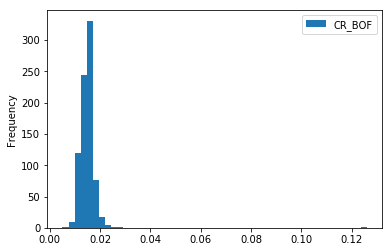

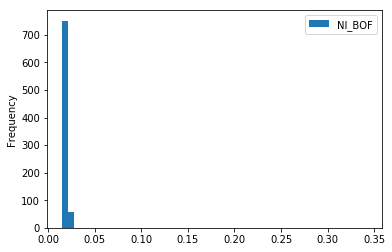

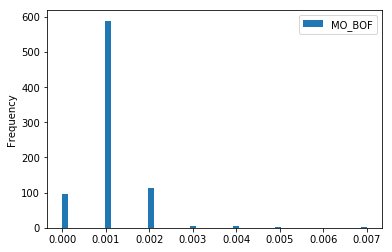

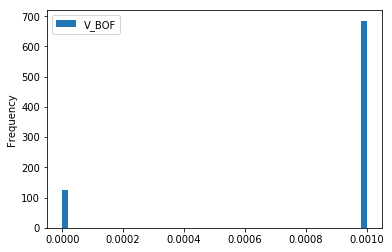

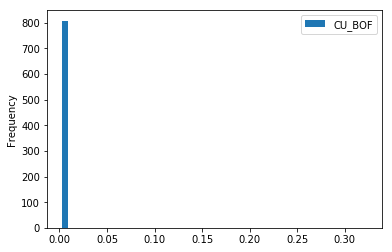

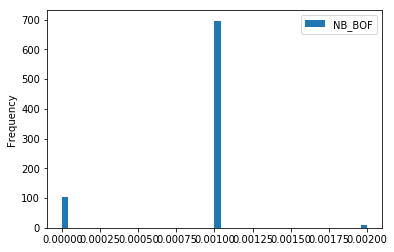

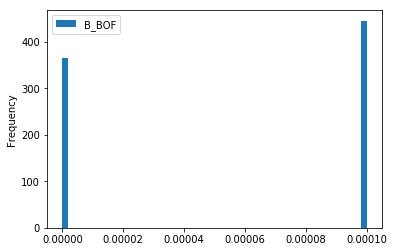

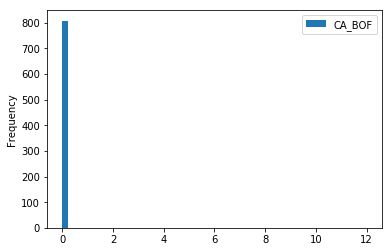

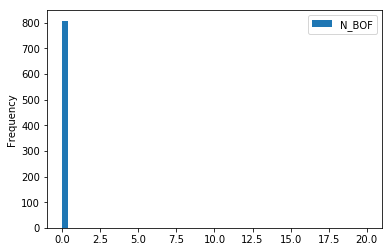

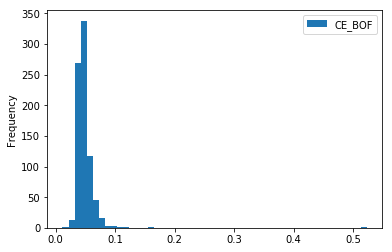

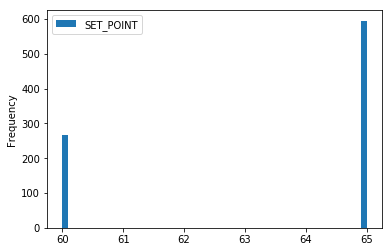

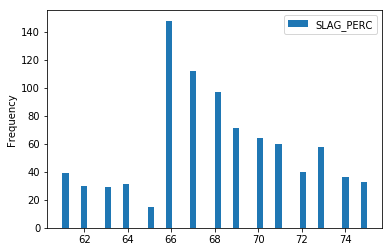

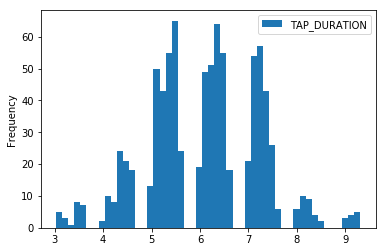

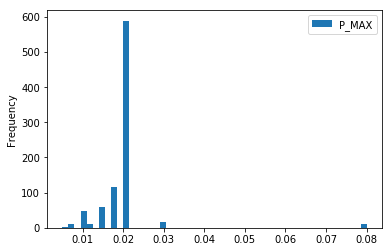

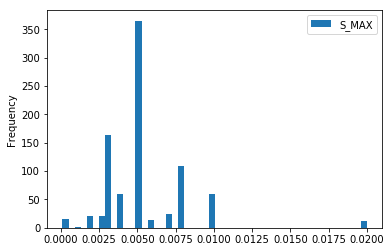

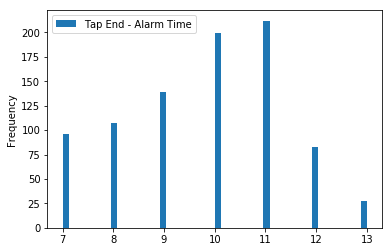

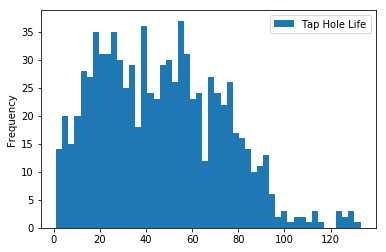

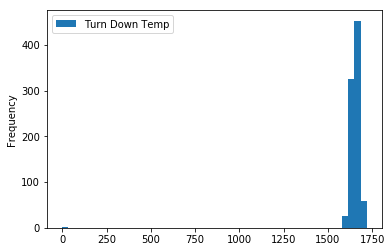

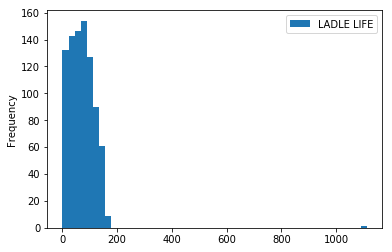

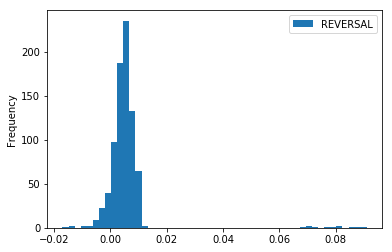

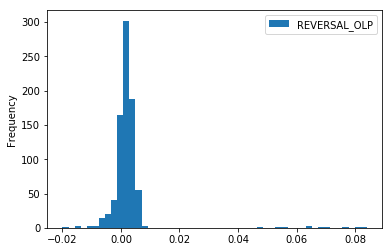

In [17]:
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Histogram"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
os.chdir(path)
for column in slag_data4:
    fig = plt.figure()
    ax = slag_data4[column].plot.hist( bins=50,label=column)
    plt.legend()
    ax.figure.savefig(column+'.jpg')

In [18]:
slag_data2.drop(columns=['AL_BOF',
                         'NI_BOF',
                         'CU_BOF',
                         'CA_BOF',
                         'N_BOF'],inplace =True)

## Density Plots

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Density Plots 


C:\Users\Shilpi Dey\Documents\ANACONDA\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Shilpi Dey\Documents\ANACONDA\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Shilpi Dey\Documents\ANACONDA\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Shilpi Dey\Documents\ANACONDA\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Shilpi Dey\Documents\ANACONDA\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures 

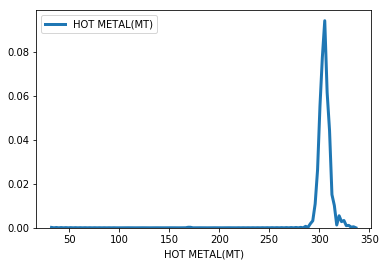

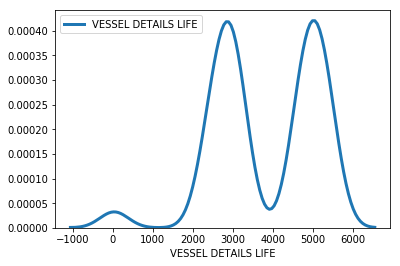

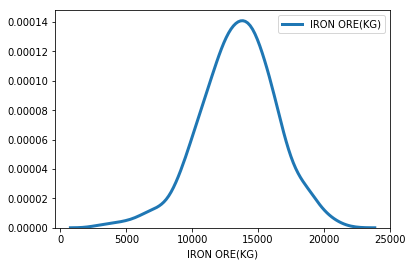

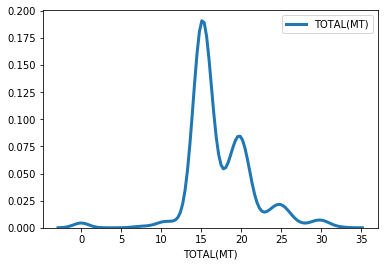

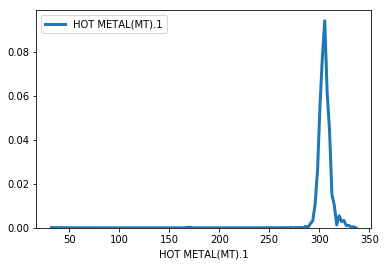

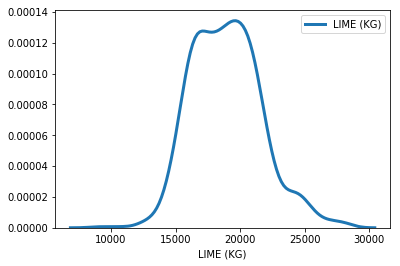

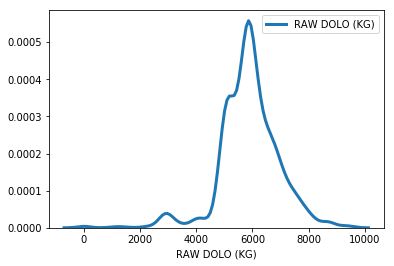

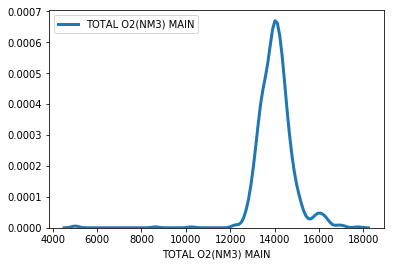

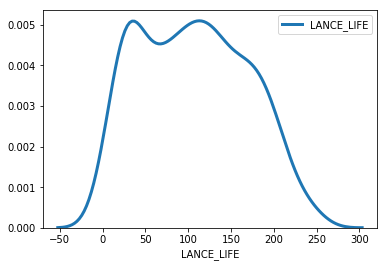

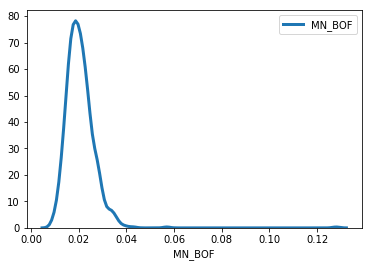

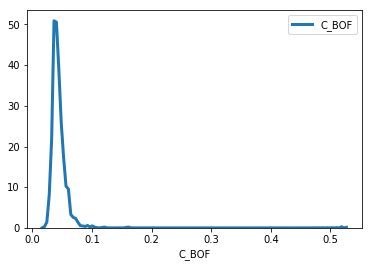

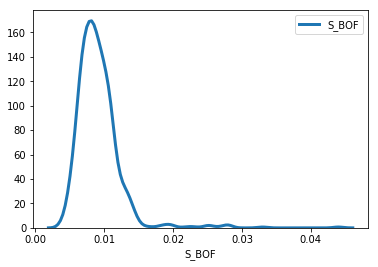

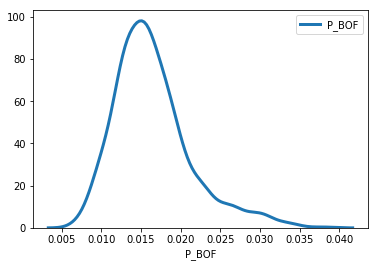

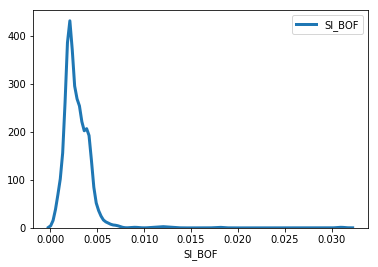

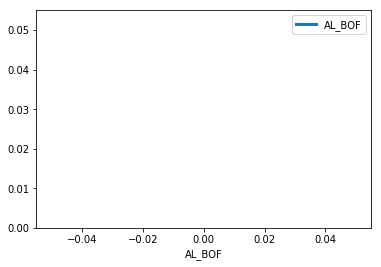

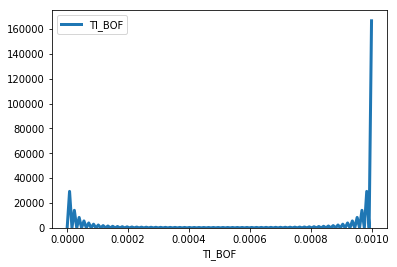

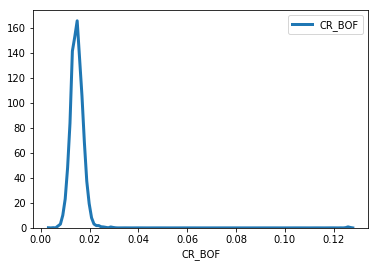

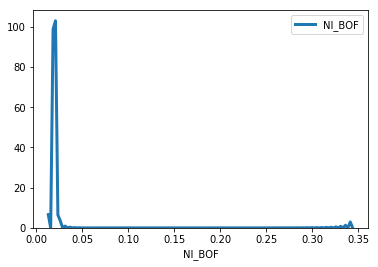

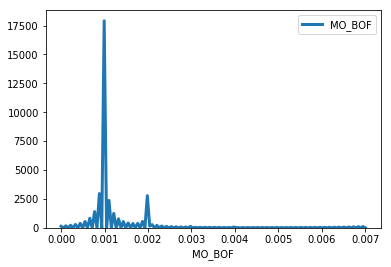

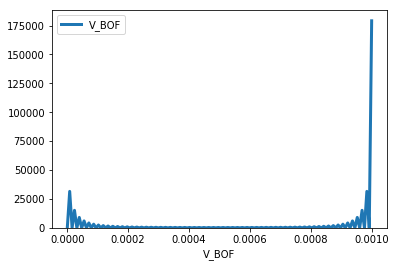

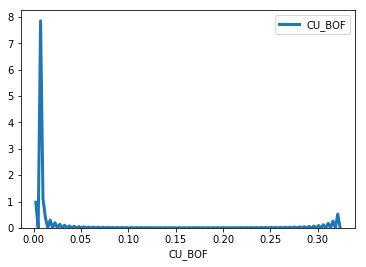

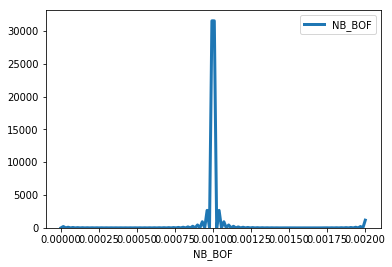

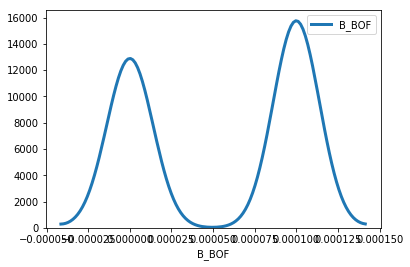

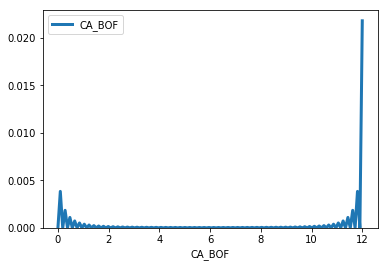

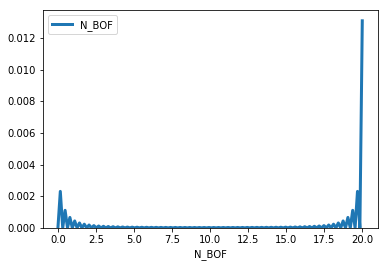

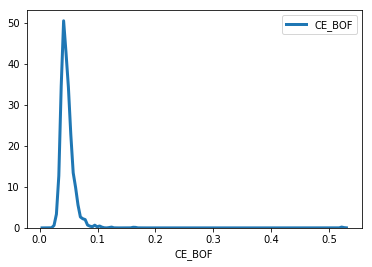

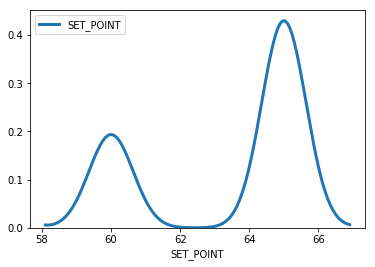

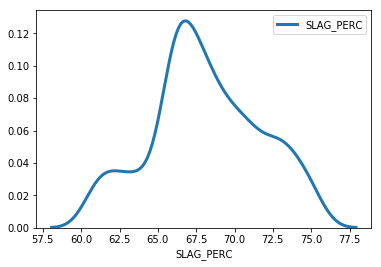

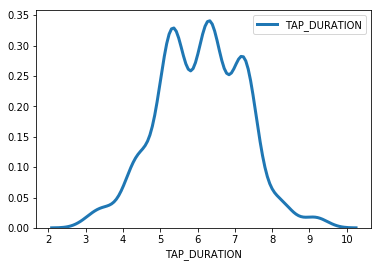

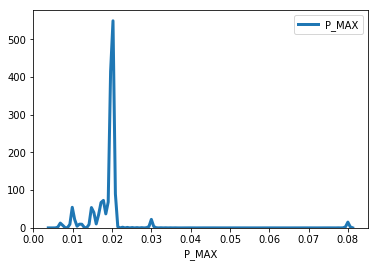

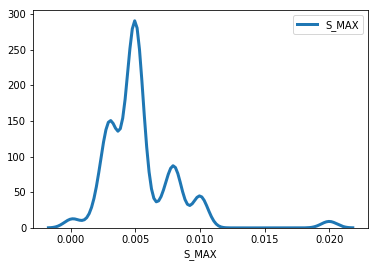

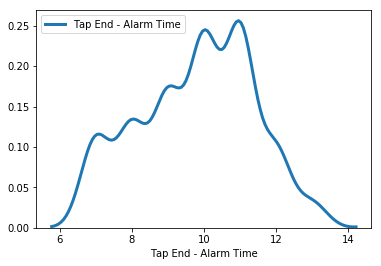

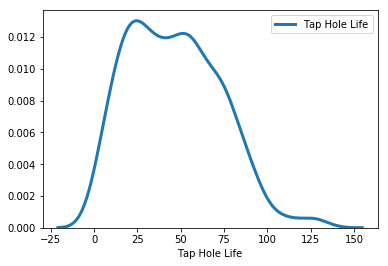

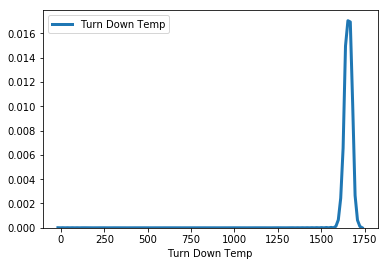

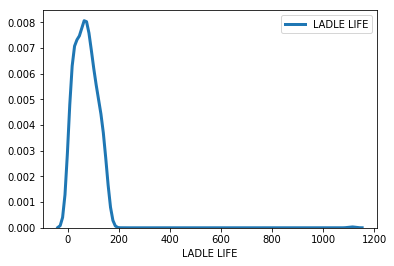

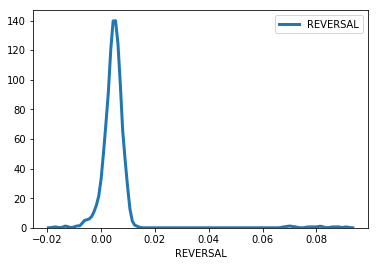

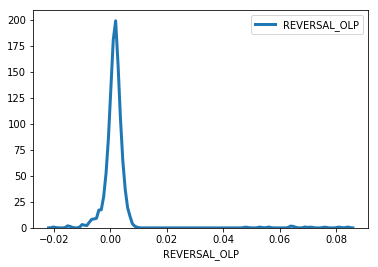

In [19]:
#Density Plots
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Density Plots"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
os.chdir(path)
for column in slag_data4:
    try:
        fig = plt.figure()
        ax = sns.distplot(slag_data4[column], hist = False, kde = True, kde_kws = {'linewidth': 3},label = column)
        ax.figure.savefig(column+'.jpg')
    except:
        print("Error with "+column)
    


## Plots of Slag percentage with various parameters

Creation of the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Reversal\P_reversal failed


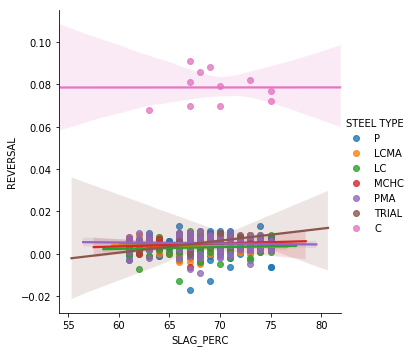

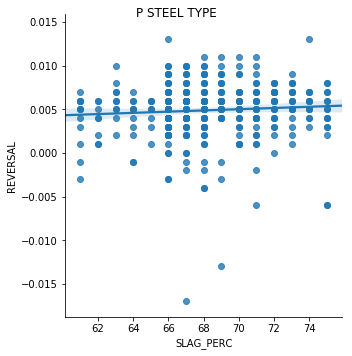

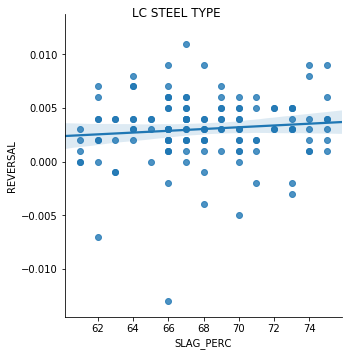

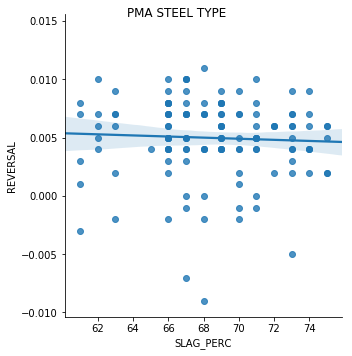

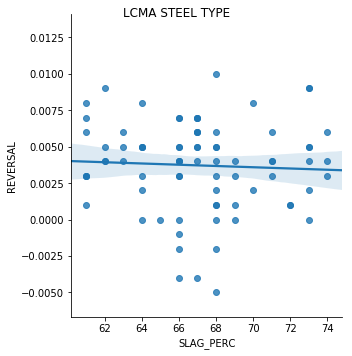

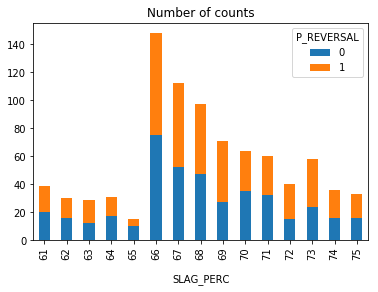

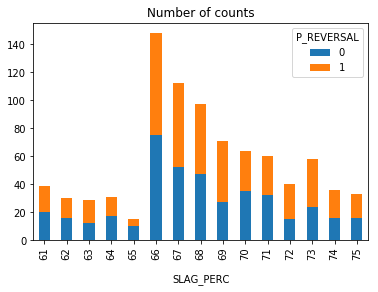

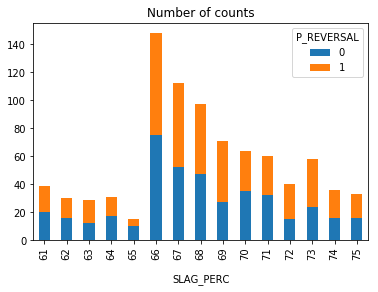

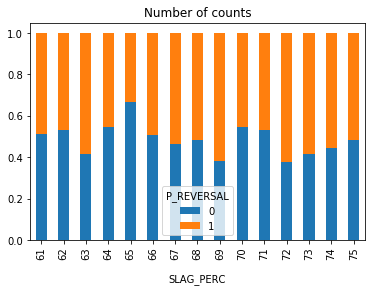

In [22]:
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Reversal\\P_reversal"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
os.chdir(path)
sns_plot = sns.lmplot(x='SLAG_PERC', y='REVERSAL', hue='STEEL TYPE', data=slag_data2)
sns_plot.savefig("slag_perc_reversal.jpg")

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='P']
sns_plot = sns.lmplot(x='SLAG_PERC', y='REVERSAL', data=slag_data4).fig.suptitle("P STEEL TYPE")
plt.savefig('slag_perc_reversal_P.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LC']
sns_plot = sns.lmplot(x='SLAG_PERC', y='REVERSAL', data=slag_data4).fig.suptitle("LC STEEL TYPE")
plt.savefig('slag_perc_reversal_LC.jpg',dpi=400)
plt.show()


slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='PMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='REVERSAL', data=slag_data4).fig.suptitle("PMA STEEL TYPE")
plt.savefig('slag_perc_reversal_PMA.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LCMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='REVERSAL', data=slag_data4).fig.suptitle("LCMA STEEL TYPE")
plt.savefig('slag_perc_reversal_LCMA.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2.groupby(['P_REVERSAL', 'SLAG_PERC'])['SLAG_PERC'].count().unstack('P_REVERSAL').fillna(0)
slag_data4[['0','1']].plot(kind='bar', stacked=True)
plt.xlabel('SLAG_PERC', labelpad=14)
plt.title('Number of counts')
plt.savefig('SLAG_PERC_p_rev.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2.groupby(['P_REVERSAL', 'SLAG_PERC'])['SLAG_PERC'].count().unstack('P_REVERSAL').fillna(0)
slag_data4[['0','1']].plot(kind='bar', stacked=True)
plt.xlabel('SLAG_PERC', labelpad=14)
plt.title('Number of counts')
plt.savefig('SLAG_PERC_p_rev.jpg',dpi=400)
plt.show()


slag_data4.to_excel("Slag_percentage_reversal.xlsx")
slag_data4 = slag_data2.groupby(['P_REVERSAL', 'SLAG_PERC'])['SLAG_PERC'].count().unstack('P_REVERSAL').fillna(0)
slag_data4[['0','1']].plot(kind='bar', stacked=True)
plt.xlabel('SLAG_PERC', labelpad=14)
plt.title('Number of counts')
plt.savefig('SLAG_PERC_p_rev.jpg',dpi=400)
plt.show()


#100% stacked Chart
slag_data4 = slag_data2.groupby(['P_REVERSAL', 'SLAG_PERC'])['SLAG_PERC'].count().unstack('P_REVERSAL').fillna(0)
slag_data4['sum'] = slag_data4.apply(sum,axis=1)
slag_data4['0'] = slag_data4['0']/slag_data4['sum']
slag_data4['1'] = slag_data4['1']/slag_data4['sum']
slag_data4.drop(columns=['sum'],inplace=True)

slag_data4[['0','1']].plot(kind='bar', stacked=True)
plt.xlabel('SLAG_PERC', labelpad=14)
plt.title('Number of counts')
plt.savefig('SLAG_PERC_p_rev_percentage.jpg',dpi=400)
plt.show()

## Tap hole with slag percentage

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Reversal\Tap hole 


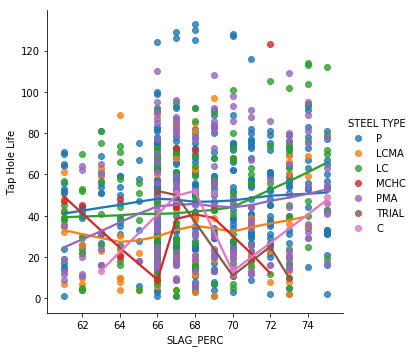

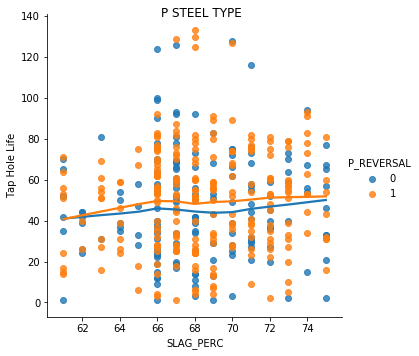

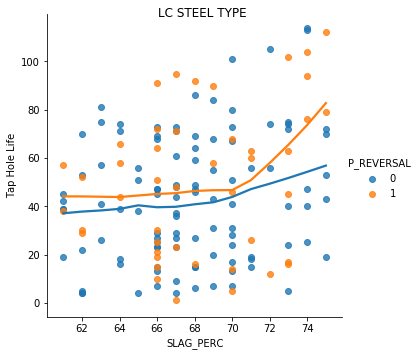

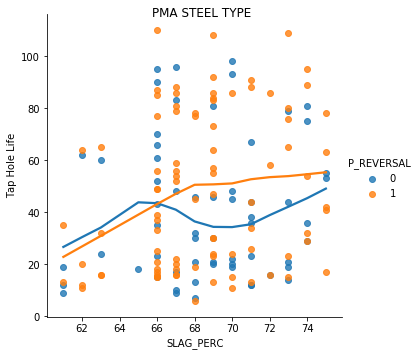

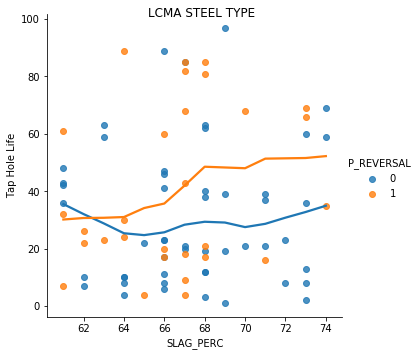

In [24]:
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Reversal\\Tap hole"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
os.chdir(path)
sns_plot = sns.lmplot(x='SLAG_PERC', y='Tap Hole Life', hue='STEEL TYPE',lowess=True, data=slag_data2)
sns_plot.savefig("slag_perc_tap_hole.jpg")

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='P']
sns_plot = sns.lmplot(x='SLAG_PERC', y='Tap Hole Life', hue='P_REVERSAL', lowess=True,data=slag_data4).fig.suptitle("P STEEL TYPE")
plt.savefig('slag_perc_tap_hole_P.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LC']
sns_plot = sns.lmplot(x='SLAG_PERC', y='Tap Hole Life', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("LC STEEL TYPE")
plt.savefig('slag_perc_tap_hole_LC.jpg',dpi=400)
plt.show()


slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='PMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='Tap Hole Life', hue='P_REVERSAL',lowess=True,  data=slag_data4).fig.suptitle("PMA STEEL TYPE")
plt.savefig('slag_perc_tap_hole_PMA.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LCMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='Tap Hole Life', hue='P_REVERSAL',lowess=True,  data=slag_data4).fig.suptitle("LCMA STEEL TYPE")
plt.savefig('slag_perc_tap_hole_LCMA.jpg',dpi=400)
plt.show()

## Vessel life with slag percentage

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Reversal\Vessel 


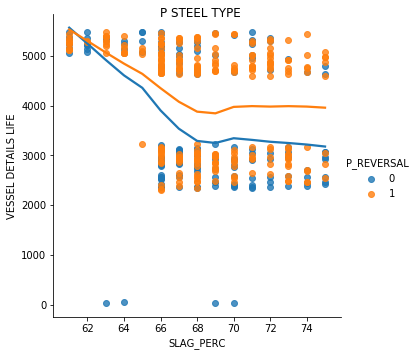

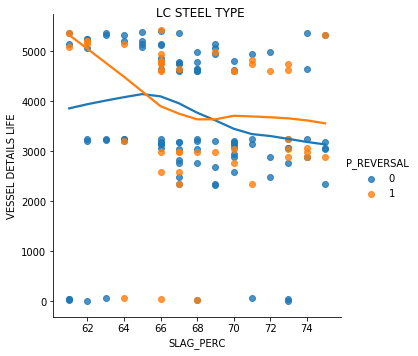

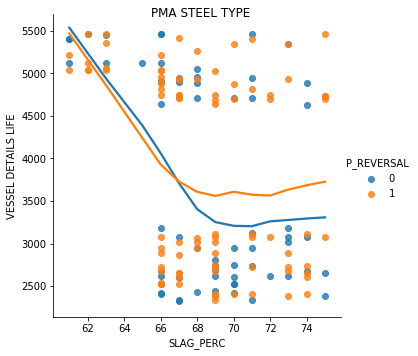

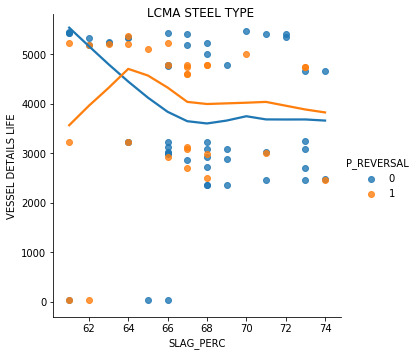

In [25]:
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Reversal\\Vessel"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

os.chdir(path)


slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='P']
sns_plot = sns.lmplot(x='SLAG_PERC', y='VESSEL DETAILS LIFE', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("P STEEL TYPE")
plt.savefig('slag_perc_vessel_life_P.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LC']
sns_plot = sns.lmplot(x='SLAG_PERC', y='VESSEL DETAILS LIFE', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("LC STEEL TYPE")
plt.savefig('slag_perc_vessel_life_LC.jpg',dpi=400)
plt.show()


slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='PMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='VESSEL DETAILS LIFE', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("PMA STEEL TYPE")
plt.savefig('slag_perc_vessel_life_PMA.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LCMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='VESSEL DETAILS LIFE', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("LCMA STEEL TYPE")
plt.savefig('slag_perc_vessel_life_LCMA.jpg',dpi=400)
plt.show()


## Laddle life with slag percentage

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Reversal\Laddle Life 


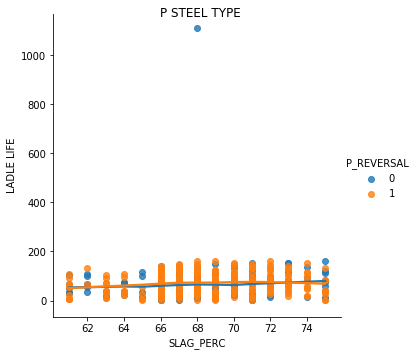

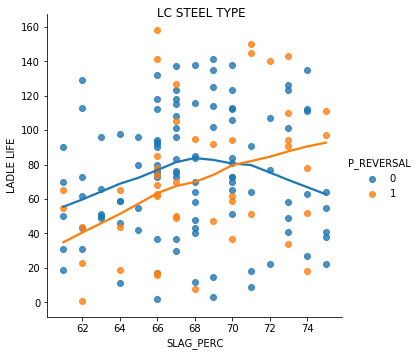

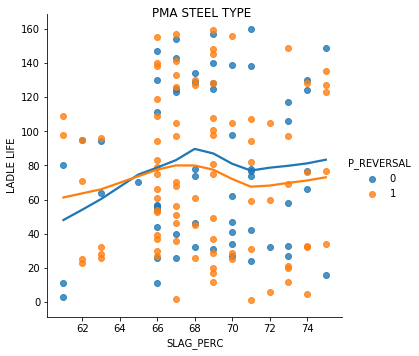

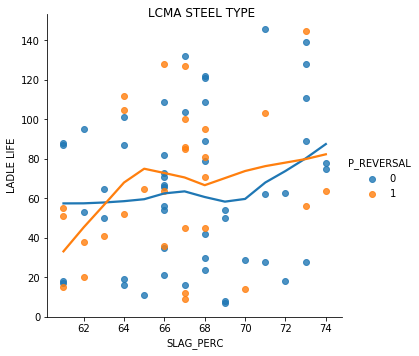

In [26]:
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Reversal\\Laddle Life"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

os.chdir(path)


slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='P']
sns_plot = sns.lmplot(x='SLAG_PERC', y='LADLE LIFE', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("P STEEL TYPE")
plt.savefig('slag_perc_laddle_life_P.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LC']
sns_plot = sns.lmplot(x='SLAG_PERC', y='LADLE LIFE', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("LC STEEL TYPE")
plt.savefig('slag_perc_laddle_life_LC.jpg',dpi=400)
plt.show()


slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='PMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='LADLE LIFE', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("PMA STEEL TYPE")
plt.savefig('slag_perc_laddle_life_PMA.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LCMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='LADLE LIFE', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("LCMA STEEL TYPE")
plt.savefig('slag_perc_laddle_life_LCMA.jpg',dpi=400)
plt.show()


## P bath with slag percentage

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Reversal\Phos 


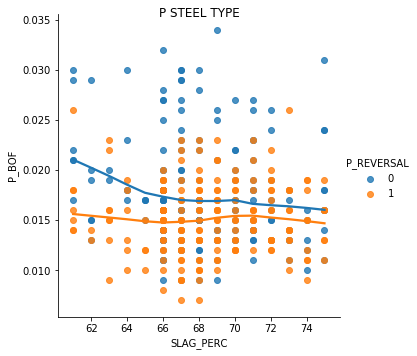

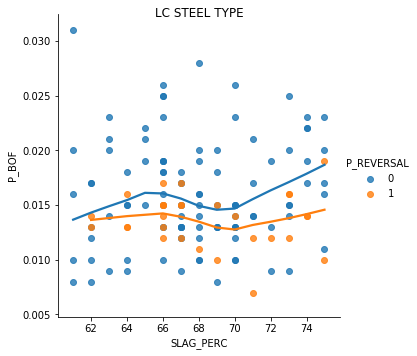

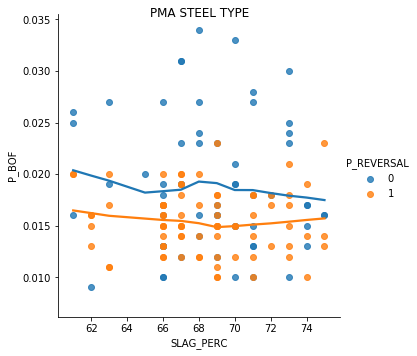

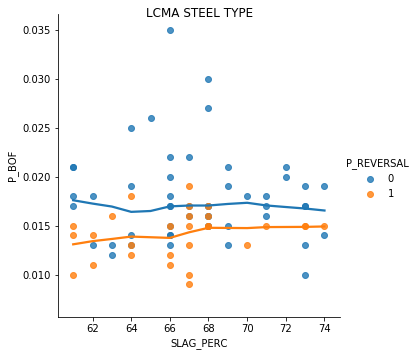

In [27]:
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Reversal\\Phos"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

os.chdir(path)



slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='P']
sns_plot = sns.lmplot(x='SLAG_PERC', y='P_BOF', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("P STEEL TYPE")
plt.savefig('slag_perc_P_bath_P.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LC']
sns_plot = sns.lmplot(x='SLAG_PERC', y='P_BOF', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("LC STEEL TYPE")
plt.savefig('slag_perc_P_bath_LC.jpg',dpi=400)
plt.show()


slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='PMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='P_BOF', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("PMA STEEL TYPE")
plt.savefig('slag_perc_P_bath_PMA.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LCMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='P_BOF', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("LCMA STEEL TYPE")
plt.savefig('slag_perc_P_bath_LCMA.jpg',dpi=400)
plt.show()


## S bath with slag percentage

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Reversal\Sulphur 


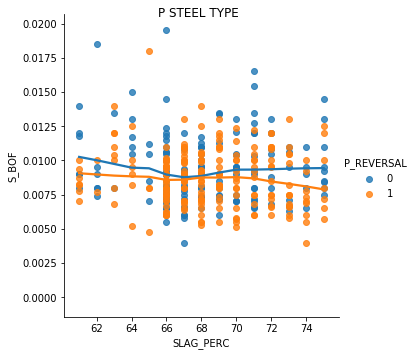

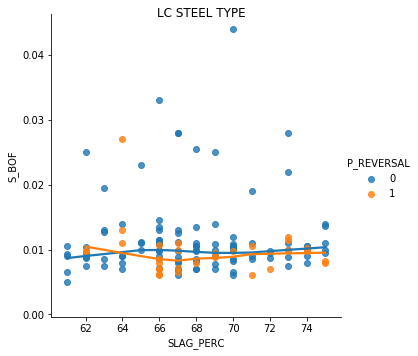

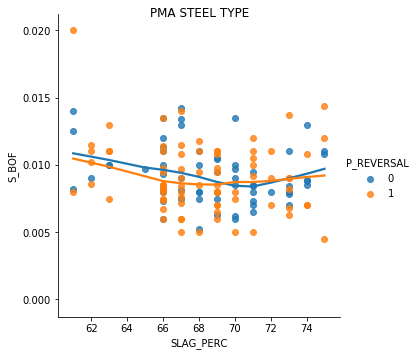

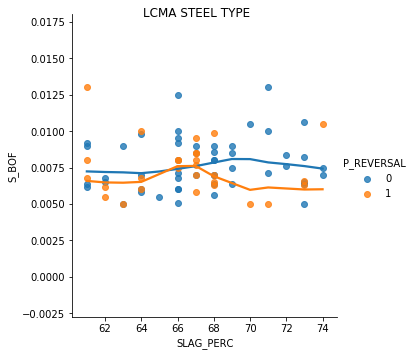

In [29]:
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Reversal\\Sulphur"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

os.chdir(path)


slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='P']
sns_plot = sns.lmplot(x='SLAG_PERC', y='S_BOF', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("P STEEL TYPE")
plt.savefig('slag_perc_S_bath_P.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LC']
sns_plot = sns.lmplot(x='SLAG_PERC', y='S_BOF', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("LC STEEL TYPE")
plt.savefig('slag_perc_S_bath_LC.jpg',dpi=400)
plt.show()


slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='PMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='S_BOF', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("PMA STEEL TYPE")
plt.savefig('slag_perc_S_bath_PMA.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LCMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='S_BOF', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("LCMA STEEL TYPE")
plt.savefig('slag_perc_S_bath_LCMA.jpg',dpi=400)
plt.show()


## TURN DOWN TEMPERATURE

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Reversal\temperature 


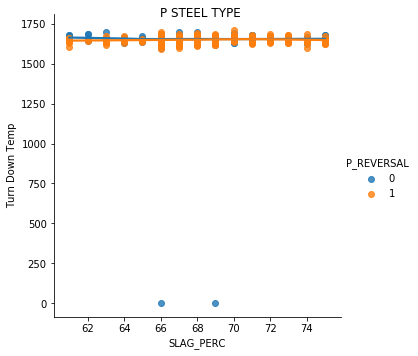

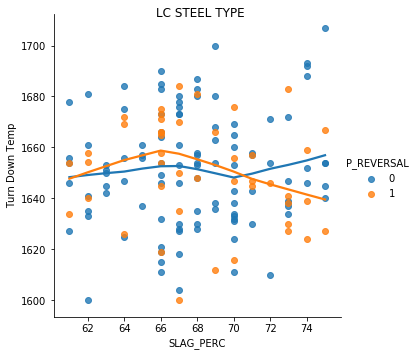

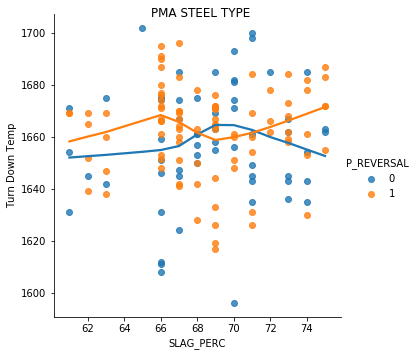

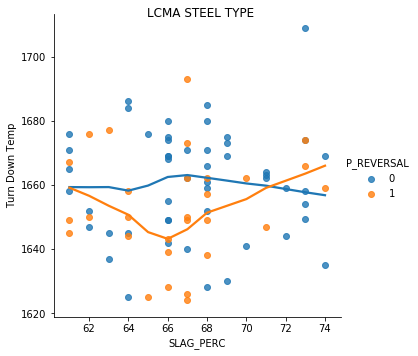

In [30]:
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Reversal\\temperature"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)


os.chdir(path)


slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='P']
sns_plot = sns.lmplot(x='SLAG_PERC', y='Turn Down Temp', hue='P_REVERSAL', lowess=True,data=slag_data4).fig.suptitle("P STEEL TYPE")
plt.savefig('slag_perc_temp_P.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LC']
sns_plot = sns.lmplot(x='SLAG_PERC', y='Turn Down Temp', hue='P_REVERSAL', lowess=True,data=slag_data4).fig.suptitle("LC STEEL TYPE")
plt.savefig('slag_perc_temp_LC.jpg',dpi=400)
plt.show()


slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='PMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='Turn Down Temp', hue='P_REVERSAL',lowess=True, data=slag_data4).fig.suptitle("PMA STEEL TYPE")
plt.savefig('slag_perc_temp_PMA.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['STEEL TYPE']=='LCMA']
sns_plot = sns.lmplot(x='SLAG_PERC', y='Turn Down Temp', hue='P_REVERSAL', lowess=True,data=slag_data4).fig.suptitle("LCMA STEEL TYPE")
plt.savefig('slag_perc_temp_LCMA.jpg',dpi=400)
plt.show()


## 5.	plot taphole life vs p rev

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Turn Down Temp 


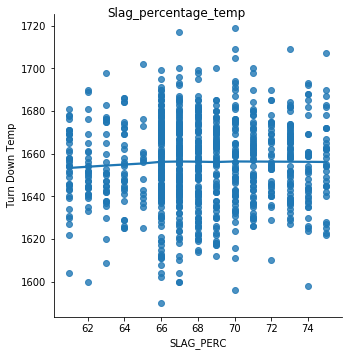

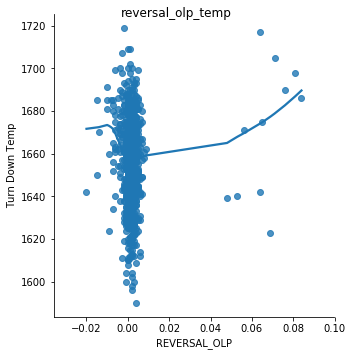

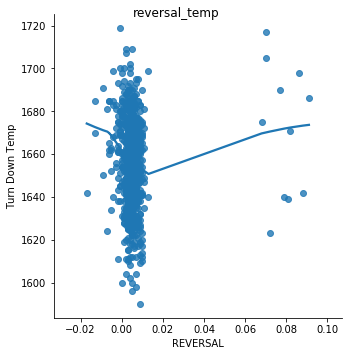

In [31]:
# for column in olp_eda2.drop(columns=['COOLANT']):
#     fig = plt.figure()
#     ax = olp_direct.plot.scatter(x='COOLANT', y=column, title= column+" vs Coolant" );
#     ax.figure.savefig(column+'.jpg')

path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Turn Down Temp"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

os.chdir(path)

##Turn down Temperature
slag_data4 = slag_data2[slag_data2['Turn Down Temp']>1000]
sns_plot = sns.lmplot(x='SLAG_PERC', y='Turn Down Temp',  lowess=True,data=slag_data4).fig.suptitle("Slag_percentage_temp")
plt.savefig('Slag_percentage_temp.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['Turn Down Temp']>1000]
sns_plot = sns.lmplot(x='REVERSAL_OLP', y='Turn Down Temp',  lowess=True,data=slag_data4).fig.suptitle("reversal_olp_temp")
plt.savefig('reversal_olp_temp.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['Turn Down Temp']>1000]
sns_plot = sns.lmplot(x='REVERSAL', y='Turn Down Temp',  lowess=True,data=slag_data4).fig.suptitle("reversal_temp")
plt.savefig('reversal_temp.jpg',dpi=400)
plt.show()

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Tap hole Life 


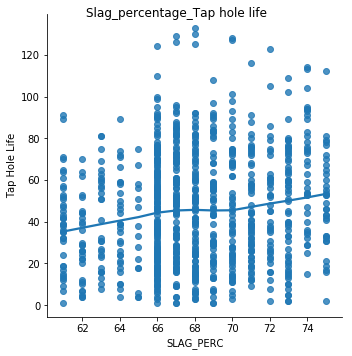

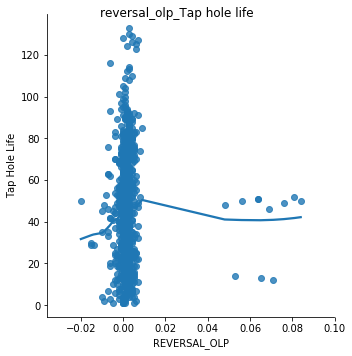

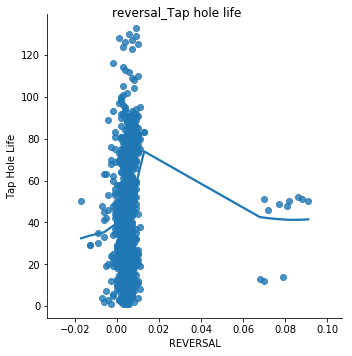

In [32]:
##Tap hole life

path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Tap hole Life"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

os.chdir(path)


sns_plot = sns.lmplot(x='SLAG_PERC', y='Tap Hole Life',  lowess=True,data=slag_data2).fig.suptitle("Slag_percentage_Tap hole life")
plt.savefig('Slag_percentage_Tap hole life.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['Turn Down Temp']>1000]
sns_plot = sns.lmplot(x='REVERSAL_OLP', y='Tap Hole Life',  lowess=True,data=slag_data2).fig.suptitle("reversal_olp_Tap hole life")
plt.savefig('reversal_olp_Tap hole life.jpg',dpi=400)
plt.show()

slag_data4 = slag_data2[slag_data2['Turn Down Temp']>1000]
sns_plot = sns.lmplot(x='REVERSAL', y='Tap Hole Life',  lowess=True,data=slag_data2).fig.suptitle("reversal_Tap hole life")
plt.savefig('reversal_Tap hole life.jpg',dpi=400)
plt.show()

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Tap hole Life square 


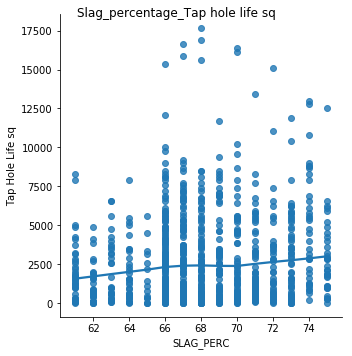

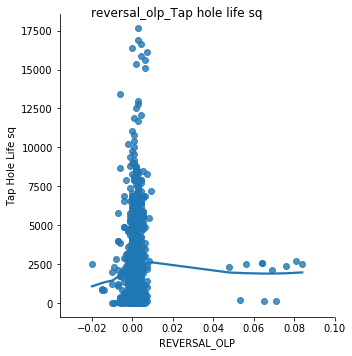

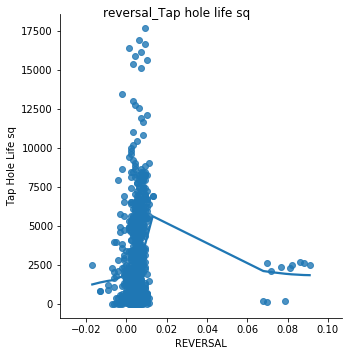

In [33]:
##Tap hole life square

path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Tap hole Life square"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

os.chdir(path)
slag_data4 = slag_data2.copy()
slag_data4['Tap Hole Life sq'] = slag_data2['Tap Hole Life']*slag_data2['Tap Hole Life']
sns_plot = sns.lmplot(x='SLAG_PERC', y='Tap Hole Life sq',  lowess=True,data=slag_data4).fig.suptitle("Slag_percentage_Tap hole life sq")
plt.savefig('Slag_percentage_Tap hole life sq.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL_OLP', y='Tap Hole Life sq',  lowess=True,data=slag_data4).fig.suptitle("reversal_olp_Tap hole life sq")
plt.savefig('reversal_olp_Tap hole life sq.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL', y='Tap Hole Life sq',  lowess=True,data=slag_data4).fig.suptitle("reversal_Tap hole life sq")
plt.savefig('reversal_Tap hole life sq.jpg',dpi=400)
plt.show()

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Tap hole Life cube 


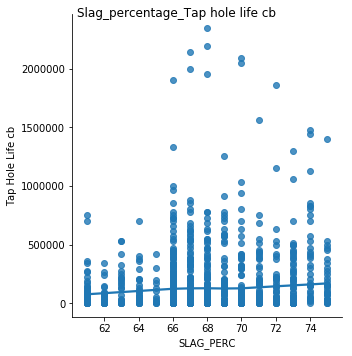

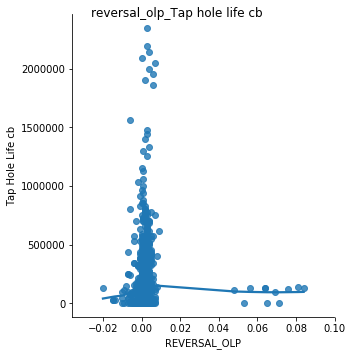

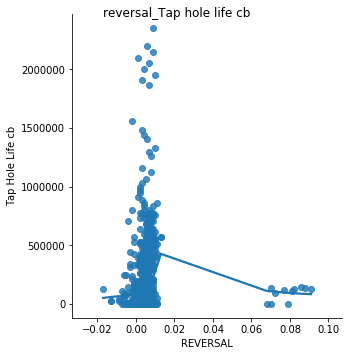

In [34]:
##Tap hole life cube


path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Tap hole Life cube"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

os.chdir(path)
slag_data4 = slag_data2.copy()
slag_data4['Tap Hole Life cb'] = slag_data2['Tap Hole Life']*slag_data2['Tap Hole Life']*slag_data2['Tap Hole Life']
sns_plot = sns.lmplot(x='SLAG_PERC', y='Tap Hole Life cb',  lowess=True,data=slag_data4).fig.suptitle("Slag_percentage_Tap hole life cb")
plt.savefig('Slag_percentage_Tap hole life cb.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL_OLP', y='Tap Hole Life cb',  lowess=True,data=slag_data4).fig.suptitle("reversal_olp_Tap hole life cb")
plt.savefig('reversal_olp_Tap hole life cb.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL', y='Tap Hole Life cb',  lowess=True,data=slag_data4).fig.suptitle("reversal_Tap hole life cb")
plt.savefig('reversal_Tap hole life cb.jpg',dpi=400)
plt.show()

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Tap hole Life sqrt 


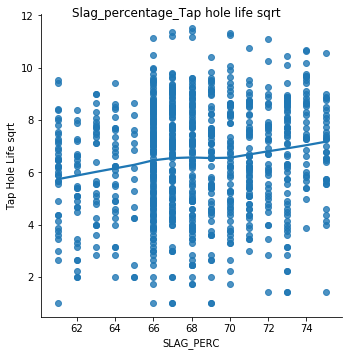

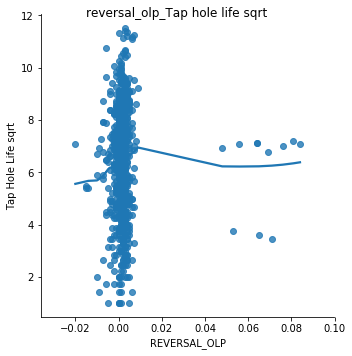

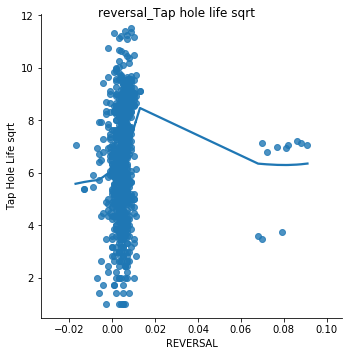

In [35]:
##Tap hole life sqrt
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Tap hole Life sqrt"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

os.chdir(path)

slag_data4 = slag_data2.copy()
slag_data4['Tap Hole Life sqrt'] = np.sqrt(slag_data2['Tap Hole Life'])
sns_plot = sns.lmplot(x='SLAG_PERC', y='Tap Hole Life sqrt',  lowess=True,data=slag_data4).fig.suptitle("Slag_percentage_Tap hole life sqrt")
plt.savefig('Slag_percentage_Tap hole life sqrt.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL_OLP', y='Tap Hole Life sqrt',  lowess=True,data=slag_data4).fig.suptitle("reversal_olp_Tap hole life sqrt")
plt.savefig('reversal_olp_Tap hole life sqrt.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL', y='Tap Hole Life sqrt',  lowess=True,data=slag_data4).fig.suptitle("reversal_Tap hole life sqrt")
plt.savefig('reversal_Tap hole life sqrt.jpg',dpi=400)
plt.show()

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Vessel Details 


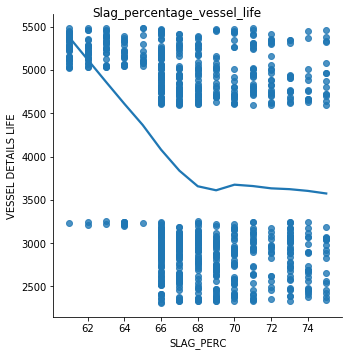

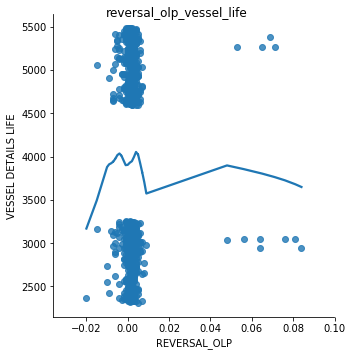

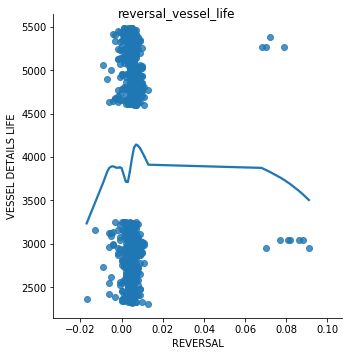

In [36]:
#'VESSEL DETAILS LIFE

path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Vessel Details"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

os.chdir(path)

slag_data4 = slag_data2[slag_data2['VESSEL DETAILS LIFE']>1000]
sns_plot = sns.lmplot(x='SLAG_PERC', y='VESSEL DETAILS LIFE',  lowess=True,data=slag_data4).fig.suptitle("Slag_percentage_vessel_life")
plt.savefig('Slag_percentage_vessel_life.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL_OLP', y='VESSEL DETAILS LIFE',  lowess=True,data=slag_data4).fig.suptitle("reversal_olp_vessel_life")
plt.savefig('reversal_olp_vessel_life.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL', y='VESSEL DETAILS LIFE',  lowess=True,data=slag_data4).fig.suptitle("reversal_vessel_life")
plt.savefig('reversal_vessel_life.jpg',dpi=400)
plt.show()

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Tap Duration 


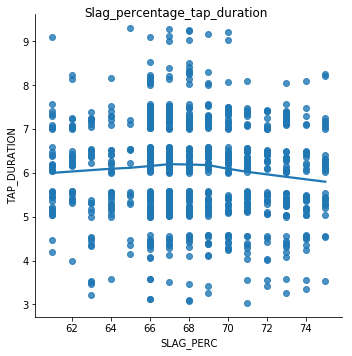

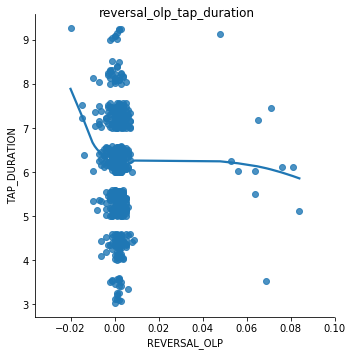

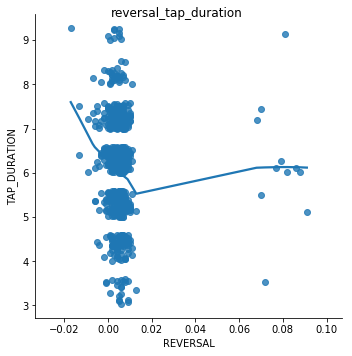

In [37]:
#'TAP_DURATION'


path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Tap Duration"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

os.chdir(path)


slag_data4 = slag_data2[slag_data2['Turn Down Temp']>1000]
sns_plot = sns.lmplot(x='SLAG_PERC', y='TAP_DURATION',  lowess=True,data=slag_data2).fig.suptitle("Slag_percentage_tap_duration")
plt.savefig('Slag_percentage_tap_duration.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL_OLP', y='TAP_DURATION',  lowess=True,data=slag_data2).fig.suptitle("reversal_olp_tap_duration")
plt.savefig('reversal_olp_tap_duratio.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL', y='TAP_DURATION',  lowess=True,data=slag_data2).fig.suptitle("reversal_tap_duration")
plt.savefig('reversal_tap_duration.jpg',dpi=400)
plt.show()

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Tap Duration sqr 


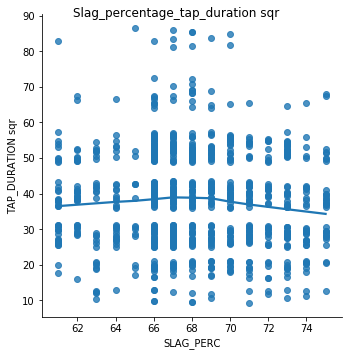

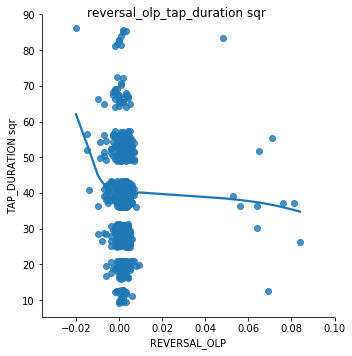

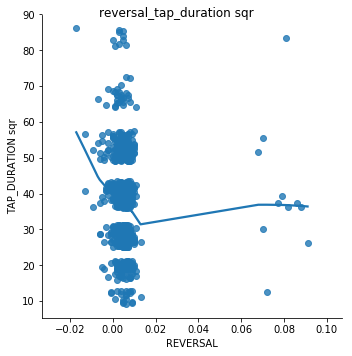

In [38]:
#'TAP_DURATION square'

path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Tap Duration sqr"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

os.chdir(path)
slag_data4 = slag_data2.copy()
slag_data4['TAP_DURATION sqr'] = np.square(slag_data2['TAP_DURATION'])
sns_plot = sns.lmplot(x='SLAG_PERC', y='TAP_DURATION sqr',  lowess=True,data=slag_data4).fig.suptitle("Slag_percentage_tap_duration sqr")
plt.savefig('Slag_percentage_tap_duration sqr.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL_OLP', y='TAP_DURATION sqr',  lowess=True,data=slag_data4).fig.suptitle("reversal_olp_tap_duration sqr")
plt.savefig('reversal_olp_tap_duration sqr.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL', y='TAP_DURATION sqr',  lowess=True,data=slag_data4).fig.suptitle("reversal_tap_duration sqr")
plt.savefig('reversal_tap_duration sqr.jpg',dpi=400)
plt.show()

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Tap Duration sqrt 


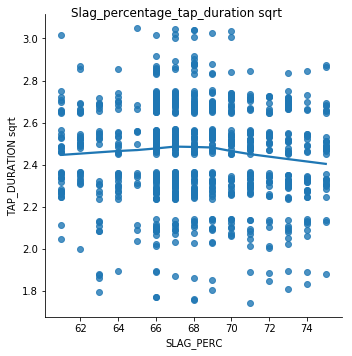

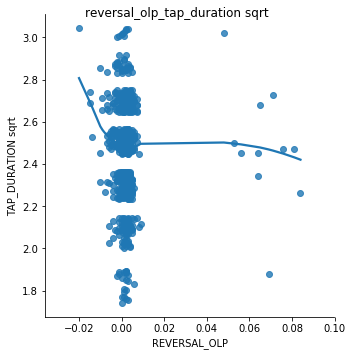

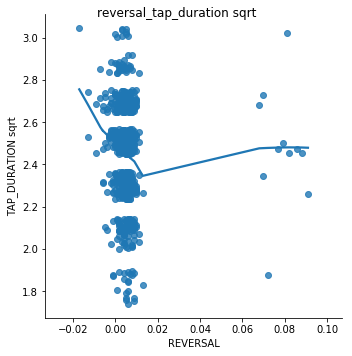

In [39]:
#'TAP_DURATION sqrt'

path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Tap Duration sqrt"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
os.chdir(path)
slag_data4 = slag_data2.copy()
slag_data4['TAP_DURATION sqrt'] = np.sqrt(slag_data2['TAP_DURATION'])
sns_plot = sns.lmplot(x='SLAG_PERC', y='TAP_DURATION sqrt',  lowess=True,data=slag_data4).fig.suptitle("Slag_percentage_tap_duration sqrt")
plt.savefig('Slag_percentage_tap_duration sqrt.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL_OLP', y='TAP_DURATION sqrt',  lowess=True,data=slag_data4).fig.suptitle("reversal_olp_tap_duration sqrt")
plt.savefig('reversal_olp_tap_duration sqrt.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL', y='TAP_DURATION sqrt',  lowess=True,data=slag_data4).fig.suptitle("reversal_tap_duration sqrt")
plt.savefig('reversal_tap_duration sqrt.jpg',dpi=400)
plt.show()

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\Lime 


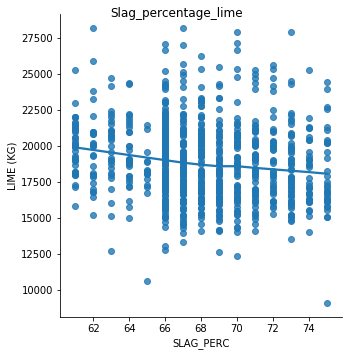

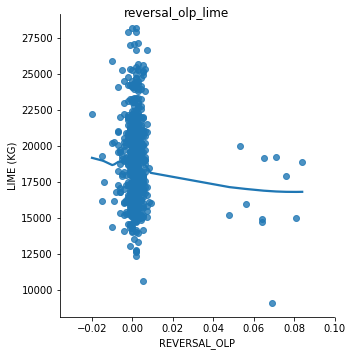

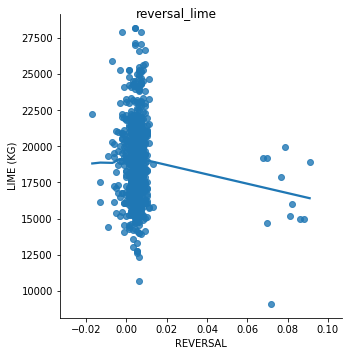

In [40]:
#'LIME (KG)'

path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\Lime"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
os.chdir(path)
sns_plot = sns.lmplot(x='SLAG_PERC', y='LIME (KG)',  lowess=True,data=slag_data2).fig.suptitle("Slag_percentage_lime")
plt.savefig('Slag_percentage_lime.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL_OLP', y='LIME (KG)',  lowess=True,data=slag_data2).fig.suptitle("reversal_olp_lime")
plt.savefig('reversal_olp_lime.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL', y='LIME (KG)',  lowess=True,data=slag_data2).fig.suptitle("reversal_lime")
plt.savefig('reversal_lime.jpg',dpi=400)
plt.show()

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\P max 


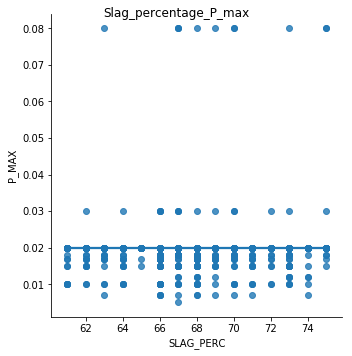

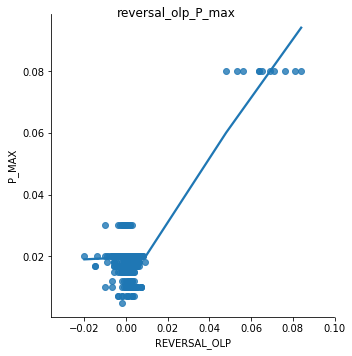

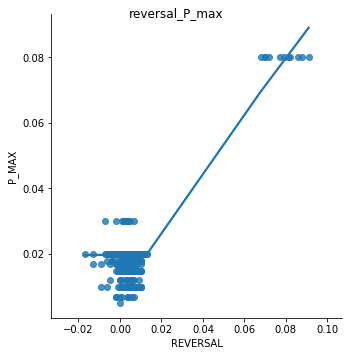

In [41]:
#'P_MAX'

path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\P max"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
os.chdir(path)
sns_plot = sns.lmplot(x='SLAG_PERC', y='P_MAX',  lowess=True,data=slag_data2).fig.suptitle("Slag_percentage_P_max")
plt.savefig('Slag_percentage_P_max.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL_OLP', y='P_MAX',  lowess=True,data=slag_data2).fig.suptitle("reversal_olp_P_max")
plt.savefig('reversal_olp_P_max.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL', y='P_MAX',  lowess=True,data=slag_data2).fig.suptitle("reversal_P_max")
plt.savefig('reversal_P_max.jpg',dpi=400)
plt.show()

Successfully created the directory C:\Users\Shilpi Dey\Documents\McKinsey\Client Work\TSK\BOF\Set point\Analysis\EDA_16032020\Combine Data\Plots\S max 


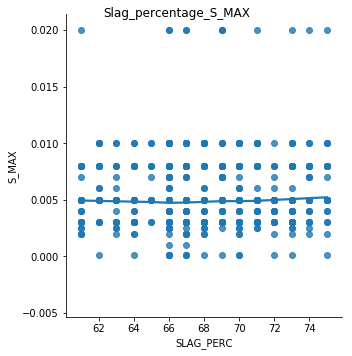

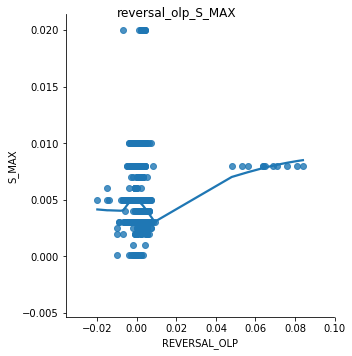

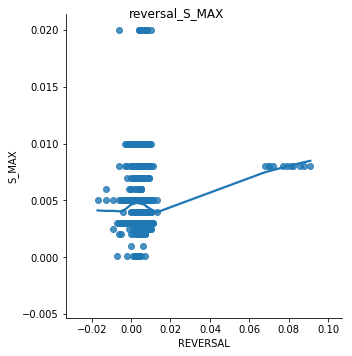

In [42]:
#'S_MAX'

path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\S max"
try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)
os.chdir(path)
sns_plot = sns.lmplot(x='SLAG_PERC', y='S_MAX',  lowess=True,data=slag_data2).fig.suptitle("Slag_percentage_S_MAX")
plt.savefig('Slag_percentage_S_MAX.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL_OLP', y='S_MAX',  lowess=True,data=slag_data2).fig.suptitle("reversal_olp_S_MAX")
plt.savefig('reversal_olp_S_MAX.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL', y='S_MAX',  lowess=True,data=slag_data2).fig.suptitle("reversal_S_MAX")
plt.savefig('reversal_S_MAX.jpg',dpi=400)
plt.show()

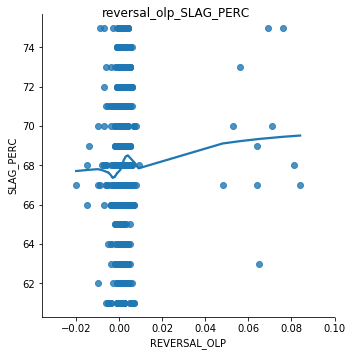

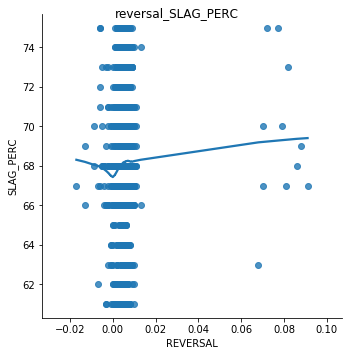

In [43]:
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\Plots\\"

os.chdir(path)

sns_plot = sns.lmplot(x='REVERSAL_OLP', y='SLAG_PERC',  lowess=True,data=slag_data2).fig.suptitle("reversal_olp_SLAG_PERC")
plt.savefig('slag_perc_reversal_OLP.jpg',dpi=400)
plt.show()

sns_plot = sns.lmplot(x='REVERSAL', y='SLAG_PERC',  lowess=True,data=slag_data2).fig.suptitle("reversal_SLAG_PERC")
plt.savefig('slag_perc_reversal.jpg',dpi=400)
plt.show()

### 8.Correlation of P rev and slag percentage vs taphole square, sq root taphole

C:\Users\Shilpi Dey\Documents\ANACONDA\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Shilpi Dey\Documents\ANACONDA\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Shilpi Dey\Documents\ANACONDA\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

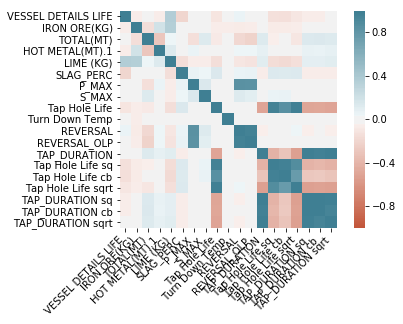

In [44]:
##Create correlation matrix
path = "C:\\Users\\Shilpi Dey\\Documents\\McKinsey\\Client Work\\TSK\\BOF\\Set point\\Analysis\\EDA_16032020\\Combine Data\\"

os.chdir(path)

slag_data3 = slag_data2[['VESSEL DETAILS LIFE', 'IRON ORE(KG)', 'TOTAL(MT)',
                         'HOT METAL(MT).1', 'LIME (KG)', 'SLAG_PERC','P_MAX', 
                         'S_MAX','Tap Hole Life', 
                         'Turn Down Temp','REVERSAL', 
                         'REVERSAL_OLP', 'TAP_DURATION']]
slag_data3['Tap Hole Life sq'] = slag_data3['Tap Hole Life']**2 
slag_data3['Tap Hole Life cb'] = slag_data3['Tap Hole Life']**3 
slag_data3['Tap Hole Life sqrt'] = np.sqrt(slag_data3['Tap Hole Life']) 

slag_data3['TAP_DURATION sq'] = slag_data3['TAP_DURATION']**2
slag_data3['TAP_DURATION cb'] = slag_data3['TAP_DURATION']**3
slag_data3['TAP_DURATION sqrt'] = np.sqrt(slag_data3['TAP_DURATION'])


corr = slag_data3.corr()
corr.to_csv("correlation_variables.csv")


ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
ax.figure.savefig('heatmap.jpg')

## Create alarm time tap time

#Tap end-alarm has different value
slag_data2['ALARM_duration']=(slag_data2['TAP_END_TIME']-slag_data2['ALARM_TIME']).dt.total_seconds()


(slag_data2['TAP_END_TIME']-slag_data2['ALARM_TIME']).dt.total_seconds()